In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

rng = np.random

%matplotlib inline
# plt.style.use('ggplot') 
# font = {'family' : 'mplus-1c-regular'}
# matplotlib.rc('font', **font)

In [2]:
# パラメタ
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 学習データ
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weigh")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# リニアモデル
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# コスト関数: 二乗誤差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# オプティマイザ: 最急降下法
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# 初期化
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.100980960 W= 0.336325 b= 0.177529
Epoch: 0100 cost= 0.098204955 W= 0.331166 b= 0.214637
Epoch: 0150 cost= 0.095749773 W= 0.326315 b= 0.249539
Epoch: 0200 cost= 0.093578383 W= 0.321752 b= 0.282364
Epoch: 0250 cost= 0.091657899 W= 0.31746 b= 0.313238
Epoch: 0300 cost= 0.089959487 W= 0.313424 b= 0.342275
Epoch: 0350 cost= 0.088457435 W= 0.309628 b= 0.369585
Epoch: 0400 cost= 0.087129004 W= 0.306057 b= 0.395271
Epoch: 0450 cost= 0.085954234 W= 0.302699 b= 0.419429
Epoch: 0500 cost= 0.084915318 W= 0.299541 b= 0.442151
Epoch: 0550 cost= 0.083996557 W= 0.29657 b= 0.463521
Epoch: 0600 cost= 0.083184049 W= 0.293776 b= 0.483621
Epoch: 0650 cost= 0.082465589 W= 0.291148 b= 0.502525
Epoch: 0700 cost= 0.081830241 W= 0.288677 b= 0.520304
Epoch: 0750 cost= 0.081268430 W= 0.286352 b= 0.537027
Epoch: 0800 cost= 0.080771655 W= 0.284166 b= 0.552755
Epoch: 0850 cost= 0.080332376 W= 0.28211 b= 0.567548
Epoch: 0900 cost= 0.079943992 W= 0.280176 b= 0.581461
Epoch: 0950 cost= 0.079600558 W

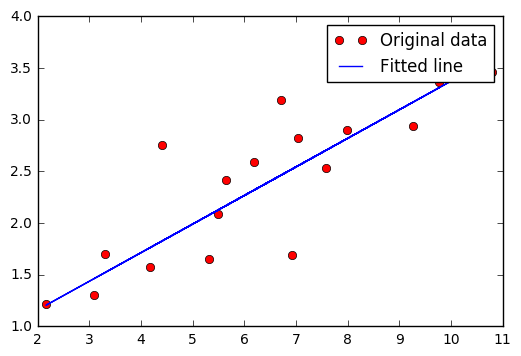

In [8]:
# 実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch:", '%04d' % (epoch+1), \
                "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
    print "Optimization Finish"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, \
        "W=", sess.run(W), "b=", sess.run(b), "\n"
    
    plt.plot(train_X, train_Y, "ro", label="Original data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()